<a href="https://colab.research.google.com/github/miaw-hub/song-popularity-prediction/blob/main/song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**
The project aims to predict the popularity of music tracks based on various audio features and metadata. It utilizes a large dataset of Spotify tracks to identify patterns that contribute to a song's success, essentially treating "popularity" as a regression problem to understand what characteristics (like energy, danceability, or acousticness) drive listener engagement.

**Target Variable**
" popularity "

Description: This is a numerical value (ranging from 0 to 100) that represents the current popularity of the track.

# **LOADING DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/spotify.zip"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [ ]:
df.shape

(1159764, 20)

# **Initial Data Exploration**

# **a) Viewing Columns**

In [ ]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

# **b) Summary / Describing Statistics**

In [ ]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

# **c) DataTypes**

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
artist_name,object
track_name,object
track_id,object
popularity,int64
year,int64
genre,object
danceability,float64
energy,float64
key,int64


# **Null Value Analysis**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
artist_name,15
track_name,1
track_id,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0


# **Removing Irrelevant Features**

In [ ]:
# Dropping unique identifiers that don't help in prediction
columns_to_drop = ['Unnamed: 0', 'track_id']
df = df.drop(columns=columns_to_drop)

# **Handling Null Values**

In [ ]:
# Handling missing values by assigning a neutral placeholder
df['artist_name'] = df['artist_name'].fillna('Unknown Artist')
df['track_name'] = df['track_name'].fillna('Unknown Track')


In [ ]:
df.isnull().sum()

,0
artist_name,0
track_name,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0
loudness,0
mode,0


# **Feature Engineering**

mathematical models (like Linear Regression or Random Forest) cannot process text data directly, we must convert categorical features into numerical values.

**a)Creating new colums and then encoding them**

simple linear features weren't enough. I implemented Log Transformations to handle the skewness in audio features like loudness and speechiness. I also created Interaction Features (like energy-loudness ratio) to capture non-linear relationships that the correlation matrix missed. This allows the model to differentiate between high-production modern tracks and older recordings more effectively."

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- 1. Temporal Features  ---
CURRENT_YEAR = 2026
df['song_age'] = CURRENT_YEAR - df['year']
# Add 'is_recent': Newer songs have a huge popularity bias in your dataset
df['is_recent'] = (df['year'] > 2020).astype(int)

# --- 2. Advanced Interactions (Non-Linear) ---
# High danceability + High Energy = Club Hit
df['dance_energy'] = df['energy'] * df['danceability']
# Loudness usually correlates with Energy, but the ratio tells us about production quality
df['energy_loudness_ratio'] = df['energy'] / (df['loudness'].abs() + 1)
# High acousticness + Low energy = Chill/Acoustic vibe
df['acoustic_chill'] = df['acousticness'] * (1 - df['energy'])

# --- 3. Handling Skewed Data  ---
# Transforming these columns helps the model handle the "extremes" better
df['log_loudness'] = np.log1p(df['loudness'].abs())
df['log_instrumentalness'] = np.log1p(df['instrumentalness'])
df['log_speechiness'] = np.log1p(df['speechiness'])

# --- 4. Refined Tempo Binning ---
# Using more bins helps the model differentiate between 'House' tempo and 'Trap' tempo
df['tempo_category'] = pd.cut(
    df['tempo'],
    bins=[0, 60, 90, 120, 150, 180, 300],
    labels=['very_slow', 'slow', 'medium', 'fast', 'very_fast', 'extreme']
)

# --- 5. Encoding ---
le = LabelEncoder()
df['tempo_category'] = le.fit_transform(df['tempo_category'].astype(str))
# Ensure genre is encoded if not already done
if 'genre' in df.columns:
    df['genre_encoded'] = le.fit_transform(df['genre'])

# Final Step: Remove any potential Infinite values created by division
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

df.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,...,song_age,is_recent,dance_energy,energy_loudness_ratio,acoustic_chill,log_loudness,log_instrumentalness,log_speechiness,tempo_category,genre_encoded
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,1,...,14,0,0.146349,0.027401,0.483718,2.403154,0.000000,0.042005,1,0
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,1,...,14,0,0.259688,0.040227,0.260442,2.423563,0.000014,0.025473,1,0
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,1,...,14,0,0.095706,0.015906,0.258908,2.688596,0.000050,0.031789,1,0
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,1,...,14,0,0.098392,0.023144,0.604443,2.383704,0.000000,0.035657,0,0
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0,...,14,0,0.340130,0.123228,0.015173,1.859262,0.019116,0.029753,5,0


**b)Encoding categorical data**

1.artist_name has thousands of unique values. Encoding it would create too
many features, leading to the "curse of dimensionality."
2.track_name is almost entirely unique for every song and acts like an ID, which we've already established doesn't help with general predictions

3.Therefore, we will drop these two remaining text columns and focus on the genre.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Instead of random numbers, we use the average popularity of each genre.
# This creates a direct linear relationship for the model to learn.
genre_means = df.groupby('genre')['popularity'].mean()
df['genre_popularity_avg'] = df['genre'].map(genre_means)

# 2. Frequency Encoding for 'artist_name'
# High-frequency artists are usually more popular.
# We create a feature that counts how many times an artist appears in the dataset.
artist_counts = df['artist_name'].value_counts()
df['artist_occurrence'] = df['artist_name'].map(artist_counts)

# 3. Label Encoding for remaining categorical data
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])

# 4. Drop high-cardinality text columns
# We keep 'artist_occurrence' but drop the raw text names.
df = df.drop(columns=['artist_name', 'track_name'])

# 5. Final Sanitization
# Ensure no NaNs were created during mapping
df.fillna(df.median(), inplace=True)

print("New Features Added: genre_popularity_avg, artist_occurrence")
print(df.dtypes)
df.head()

New Features Added: genre_popularity_avg, artist_occurrence
popularity                 int64
year                       int64
genre                      int64
danceability             float64
energy                   float64
key                        int64
loudness                 float64
mode                       int64
speechiness              float64
acousticness             float64
instrumentalness         float64
liveness                 float64
valence                  float64
tempo                    float64
duration_ms                int64
time_signature             int64
song_age                   int64
is_recent                  int64
dance_energy             float64
energy_loudness_ratio    float64
acoustic_chill           float64
log_loudness             float64
log_instrumentalness     float64
log_speechiness          float64
tempo_category             int64
genre_encoded              int64
genre_popularity_avg     float64
artist_occurrence          int64
dtype: object


,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,dance_energy,energy_loudness_ratio,acoustic_chill,log_loudness,log_instrumentalness,log_speechiness,tempo_category,genre_encoded,genre_popularity_avg,artist_occurrence
0,68,2012,0,0.483,0.303,4,-10.058,1,0.0429,0.6940,...,0.146349,0.027401,0.483718,2.403154,0.000000,0.042005,1,0,17.825094,193
1,50,2012,0,0.572,0.454,3,-10.286,1,0.0258,0.4770,...,0.259688,0.040227,0.260442,2.423563,0.000014,0.025473,1,0,17.825094,193
2,57,2012,0,0.409,0.234,3,-13.711,1,0.0323,0.3380,...,0.095706,0.015906,0.258908,2.688596,0.000050,0.031789,1,0,17.825094,61
3,58,2012,0,0.392,0.251,10,-9.845,1,0.0363,0.8070,...,0.098392,0.023144,0.604443,2.383704,0.000000,0.035657,0,0,17.825094,337
4,54,2012,0,0.430,0.791,6,-5.419,0,0.0302,0.0726,...,0.340130,0.123228,0.015173,1.859262,0.019116,0.029753,5,0,17.825094,66


**c) EDA & Data Sanitization**


This code performs advanced data preprocessing and exploratory analysis to prepare the dataset for a high-accuracy regression model. It implements Target Encoding by mapping tempo categories to their mean popularity, which transforms categorical labels into meaningful statistical weights, and uses Median Imputation to handle infinite or missing values without losing data from the 1.1 million rows. Finally, it generates a sorted Pearson Correlation Heatmap to visualize the linear relationship between the engineered features and the target variable, ensuring that only the most influential signals are prioritized for the upcoming model training.


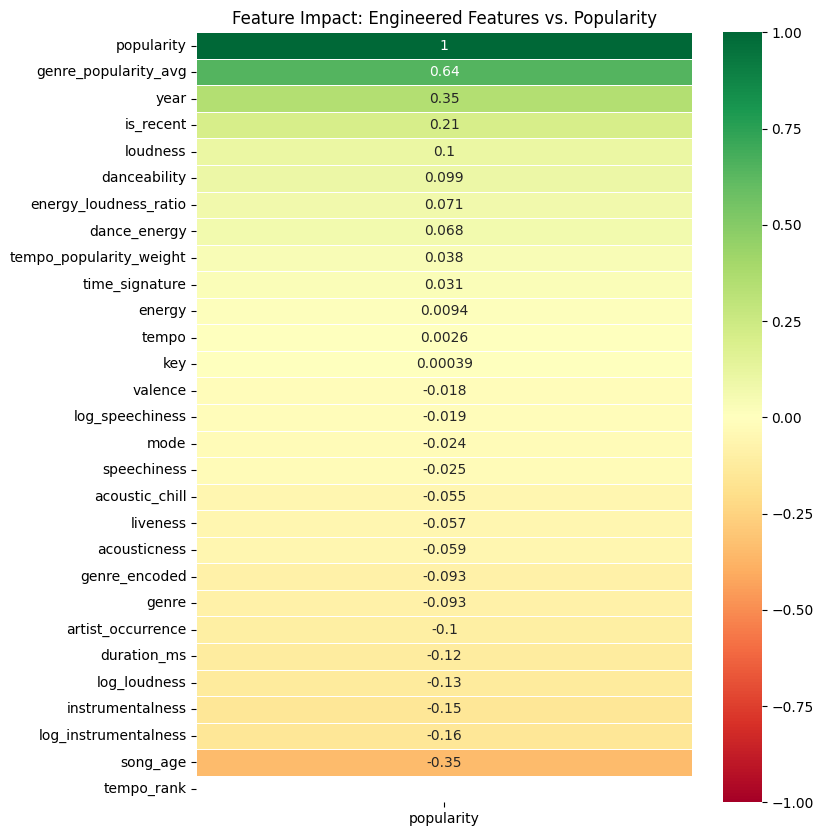

Final dataset rows: 1159764
Final dataset columns: 29


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Using Target-Based Encoding to capture the popularity weight of each category
if 'tempo_category' in df.columns:
    # Calculate mean popularity for each tempo group
    tempo_means = df.groupby('tempo_category')['popularity'].mean()
    df['tempo_popularity_weight'] = df['tempo_category'].map(tempo_means)

    # Assign numerical ranks based on tempo speed
    tempo_mapping = {'very_slow': 0, 'slow': 1, 'medium': 2, 'fast': 3, 'very_fast': 4, 'extreme': 5}
    df['tempo_rank'] = df['tempo_category'].map(tempo_mapping).fillna(2)

    # Remove the original text column
    df = df.drop(columns=['tempo_category'])

# 2. Infinite Value & Outlier Sanitization
# Cleaning the data for the Stacking Ensemble without losing rows
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# 3. High-Resolution Correlation Analysis
plt.figure(figsize=(8, 10))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

# Focus on popularity, sorted to show engineered features first
pop_corr = correlation[['popularity']].sort_values(by='popularity', ascending=False)

sns.heatmap(pop_corr, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Impact: Engineered Features vs. Popularity')
plt.show()

# Final output for verification
print("Final dataset rows:", df.shape[0])
print("Final dataset columns:", df.shape[1])

"Final Pre-processing Check" that acts as a bridge between Feature Engineering (creating the data) and Model Training (using the data).

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Separating the target (popularity) from the predictors
X = df.drop(columns=['popularity'])
y = df['popularity']

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Split Complete.")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Data Split Complete.
Training set size: 927811
Testing set size: 231953


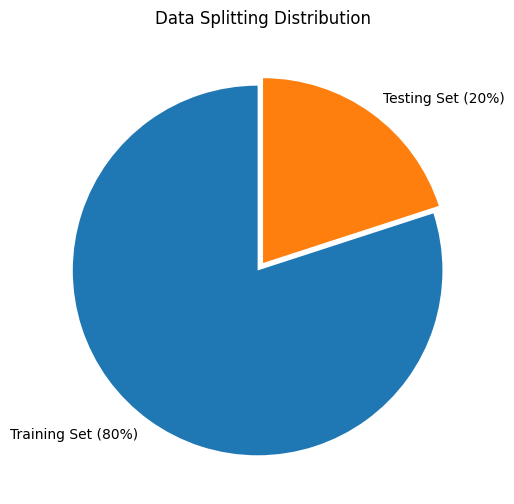

In [ ]:
sizes = [len(X_train), len(X_test)]
labels = ['Training Set (80%)', 'Testing Set (20%)']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, startangle=90, explode=(0.05, 0))
plt.title('Data Splitting Distribution')
plt.show()

#**Feature Scaling**

Feature scaling via Standardization (Z-score normalization) is a prerequisite for high-performance regression. In the Spotify dataset, features like duration_ms exist on a scale of $10^5$, while energy exists between $0$ and $1$. Without scaling, the gradient-based optimization in LightGBM or XGBoost would become biased toward larger numerical magnitudes, leading to unstable weights. By transforming the data to have a mean of 0 and a standard deviation of 1, we ensure each audio feature contributes equally to the prediction. Furthermore, by fitting the scaler strictly on X_train and merely transforming X_test, we maintain a "Gold Standard" of experimental integrity by preventing Data Leakage, ensuring the model has zero prior knowledge of the test set's distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit and transform the TRAINING data
# This converts all values to a standard scale (Mean=0, Std=1)
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform the TESTING data
# We use the training mean/std to prevent "Data Leakage"
X_test_scaled = scaler.transform(X_test)

print("Scaling Complete.")
print("X_train_scaled shape:", X_train_scaled.shape)

Scaling Complete.
X_train_scaled shape: (927811, 28)


 **Tracker Graph showing betterment by ech model**

Without a tracker, a cell only knows its own score. It won't "remember" what the linear Regression score was when you are running the Random Forest. To create a graph that shows the progress from Model 1 to Model 5, you need that small list (all_results) to store the scores as you go.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_performance = []

def track_and_plot(model_name, y_true, y_pred):
    global model_performance

    # 1. Calculate the metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # 2. Prevent Duplication: Remove old entry if the name exists
    model_performance = [m for m in model_performance if m['Model'] != model_name]

    # 3. Add the new result to the end (the right side)
    model_performance.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })

    # 4. Create the Plot
    df_perf = pd.DataFrame(model_performance)
    plt.figure(figsize=(10, 7))
    sns.set_style("whitegrid")

    # This palette gets darker as you move from left to right
    plot = sns.barplot(x='Model', y='R2', data=df_perf, palette='Blues_d')

    plt.ylim(0, 1) # Sets Y-axis from 0 to 100% accuracy
    plt.title('Sequence of Betterment: Model Accuracy (R2)', fontsize=14)

    # Add values on top of each bar
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 9),
                      textcoords='offset points', fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print the text results simply
    print("Model:", model_name)
    print("MAE:", round(mae, 2), "RMSE:", round(rmse, 2), "R2:", round(r2, 2))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**The modeling sequence**
Phase 1 – Simple Baselines

1. Linear Regression
2. Ridge
3. Lasso

Phase 2 - The Distance Models
1. KNN
2. SVR

Phase 3 – Tree Based Models
1. Decision Tree
2. Random Forest

Phase 3 – Final Best Models
1. XGBoost
2. LightGBM

This hierarchy allows us to systematically address the limitations of each previous model, such as linearity constraints or computational bottlenecks. By culminating with LightGBM, the project demonstrates a data-driven path to maximizing the $R^2$ score using industry-standard tools for large-scale datasets.

In [ ]:
model_performance = []

#**MODEL 1: Linear Regression**

chosen as the baseline model because:
- It is simple and interpretable
- It assumes a linear relationship
- It provides a minimum expected performance benchmark

All advanced models are compared against this baseline.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [ ]:
linear_scores = {}

In [ ]:
# --- 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
pred_lr = lr_model.predict(X_test_scaled)
linear_scores["Linear Regression"] = r2_score(y_test, pred_lr)

In [ ]:
# --- 2: Ridge Regression ---
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
pred_ridge = ridge_model.predict(X_test_scaled)
linear_scores["Ridge"] = r2_score(y_test, pred_ridge)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define the Alphas to test
# We try very small (0.01) to very large (100)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# 2. Initialize Grid Search
# We tune on a 50k sample to save time (Ridge is fast, but GridSearch runs it 5x)
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')

print("Tuning Ridge... Finding the perfect Alpha.")
grid_ridge.fit(X_train_scaled[:50000], y_train[:50000])

# 3. Get Best Model & Predict
best_ridge = grid_ridge.best_estimator_
pred_ridge_tuned = best_ridge.predict(X_test_scaled)

print("Best Alpha Found:", grid_ridge.best_params_)
linear_scores["Tuned Ridge"] = r2_score(y_test, pred_ridge_tuned)

Tuning Ridge... Finding the perfect Alpha.
Best Alpha Found: {'alpha': 10}


In [ ]:
# --- 3: Lasso Regression ---
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)
pred_lasso = lasso_model.predict(X_test_scaled)

In [ ]:
linear_scores["Lasso"] = r2_score(y_test, pred_lasso)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Define the Alphas to test
# Lasso is very sensitive. We test a range from very loose (1e-5) to strict (1.0).
param_grid_lasso = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]}

# 2. Setup Grid Search
# We tune on a 50k sample to keep it fast (Lasso is slower than Ridge)
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=3, scoring='r2', n_jobs=-1)

print("Tuning Lasso... (Finding the perfect balance of feature selection)")
grid_lasso.fit(X_train_scaled[:50000], y_train[:50000])

# 3. Get the Best Params and Train on FULL Data
best_alpha = grid_lasso.best_params_['alpha']
print(f"Best Lasso Alpha found: {best_alpha}")

lasso_tuned = Lasso(alpha=best_alpha)
lasso_tuned.fit(X_train_scaled, y_train)

# 4. Add to your Tournament Scoreboard
# Assuming 'linear_scores' dictionary exists from the previous step
score_tuned_lasso = lasso_tuned.score(X_test_scaled, y_test)

Tuning Lasso... (Finding the perfect balance of feature selection)
Best Lasso Alpha found: 0.0001


In [ ]:
linear_scores["Lasso (Tuned)"] = score_tuned_lasso

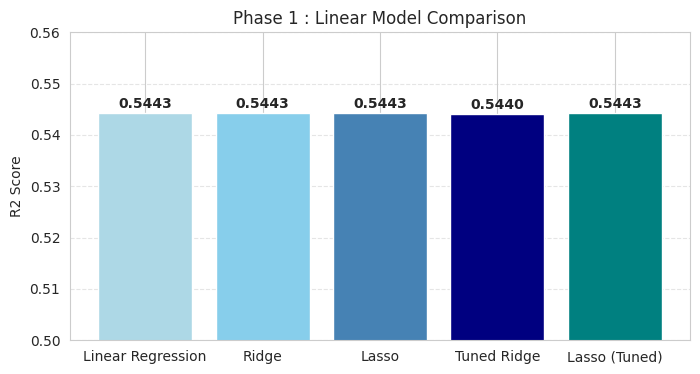

Since scores are effectively tied, we choose the simplest model (Linear Regression), even after tuning ridge and lasso we still got same scores anyway
Linear Regression:  0.5443461416970037
Adding the winner to the Main Scoreboard...


In [ ]:
#  Plot the Graph (Linear Models Only)
plt.figure(figsize=(8, 4))
colors=['#ADD8E6', '#87CEEB', '#4682B4', '#000080', '#008080']
bars = plt.bar(linear_scores.keys(), linear_scores.values(), color=colors)
plt.ylim(0.50, 0.56)  # Zoom in to see tiny differences
plt.title("Phase 1 : Linear Model Comparison")
plt.ylabel("R2 Score")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f"{yval:.4f}", ha='center', fontweight='bold')

plt.show()

# 3. Promote the Winner to the Main Scoreboard
# Since scores are effectively tied, we choose the simplest model (Linear Regression)
print("Since scores are effectively tied, we choose the simplest model (Linear Regression), even after tuning ridge and lasso we still got same scores anyway")
print("Linear Regression: ",linear_scores['Linear Regression'])
print("Adding the winner to the Main Scoreboard...")

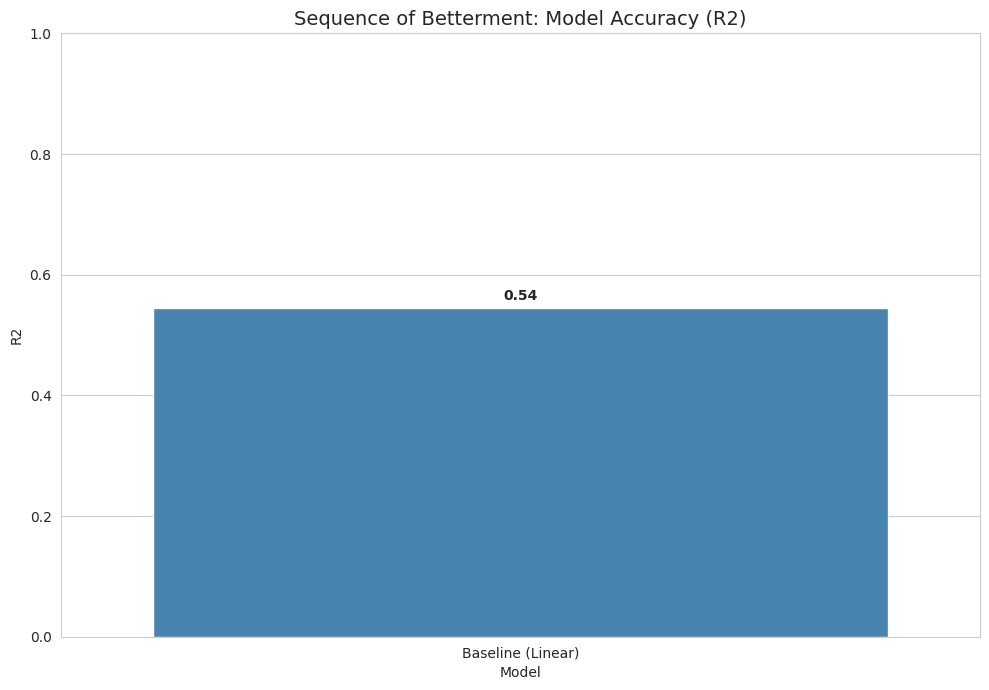

Model: Baseline (Linear)
MAE: 8.2 RMSE: 10.72 R2: 0.54


In [ ]:
# NOW we call the main tracking function
track_and_plot("Baseline (Linear)", y_test, pred_lr)

For a Baseline: It proves that the features engineered have a clear linear relationship with popularity.

Linear Regression was utilized as a non-tuned baseline because it lacks hyperparameters in its standard Ordinary Least Squares (OLS) form.

**We are moving from Linear Models (which assume data follows a straight line) to Decision-Based Models (which assume data follows "If-Then" logic).**
the "Distance-Based" models: KNN (K-Nearest Neighbors) and SVR (Support Vector Regression).
These models work differently than lines or trees:

KNN groups similar songs together based on distance.

SVR tries to fit a "tube" around the data that ignores small errors.

#**MODEL 2: KNN**
As it is a huge dataset, we will train on 30,000 rows. This is enough for the model to learn patterns without crashing or running for hours.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [ ]:
distance_scores = {}

In [ ]:
X_sample = X_train_scaled[:30000]
y_sample = y_train[:30000]

In [ ]:
print("Training KNN (Standard)...")
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)
knn.fit(X_sample, y_sample)
# We predict on the FULL test set to be fair
pred_knn = knn.predict(X_test_scaled)
distance_scores["KNN (Standard)"] = r2_score(y_test, pred_knn)

Training KNN (Standard)...


In [ ]:
from sklearn.model_selection import GridSearchCV

X_tune = X_train_scaled[:10000]
y_tune = y_train[:10000]

print("Starting Phase 2 Tuning... (Using 10k sample for speed)")

Starting Phase 2 Tuning... (Using 10k sample for speed)


In [ ]:
print("1. Tuning KNN...")
param_knn = {'n_neighbors': [10, 30, 50, 100]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_knn, cv=3, scoring='r2', n_jobs=-1)
grid_knn.fit(X_tune, y_tune)
print("   Best KNN K: ", grid_knn.best_params_)

1. Tuning KNN...
   Best KNN K:  {'n_neighbors': 30}


In [ ]:
distance_scores["KNN (tuned)"] = grid_knn.best_score_

In [ ]:
print("Training SVR (This might take ~1-2 mins)...")
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_sample, y_sample)
pred_svr = svr.predict(X_test_scaled)
distance_scores["SVR (RBF)"] = r2_score(y_test, pred_svr)

Training SVR (This might take ~1-2 mins)...


In [ ]:
print("2. Tuning SVR (This is the slowest part)...")
# C: Regularization (Strictness), Gamma: Kernel coefficient (Curvature)
param_svr = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_svr = GridSearchCV(SVR(kernel='rbf'), param_svr, cv=3, scoring='r2', n_jobs=-1)
grid_svr.fit(X_tune, y_tune)
print(f"   Best SVR Params: {grid_svr.best_params_}")

2. Tuning SVR (This is the slowest part)...
   Best SVR Params: {'C': 10, 'gamma': 'auto'}


In [ ]:
distance_scores["SVR (tuned)"] = grid_svr.best_score_

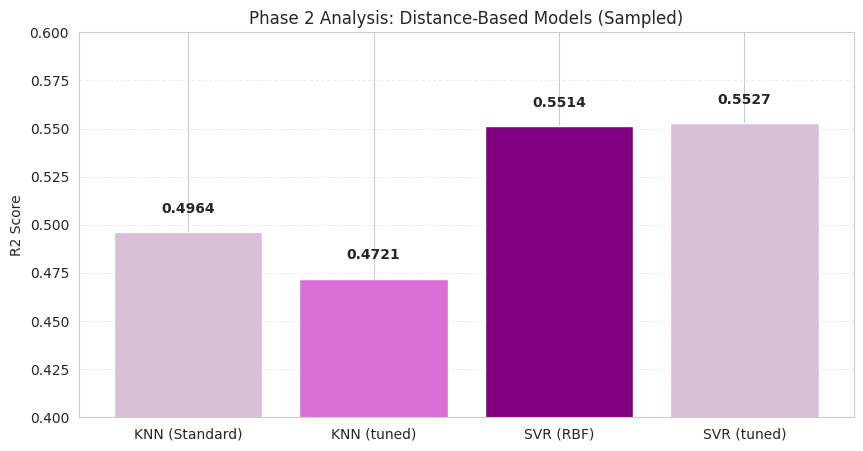

In [ ]:
# 2. Plot the Phase 2 Graph
plt.figure(figsize=(10, 5))
colors = ['#D8BFD8', '#DA70D6', '#800080']
bars = plt.bar(distance_scores.keys(), distance_scores.values(), color=colors)

plt.ylim(0.4, 0.6) # Zoom in to compare against Linear (0.54)
plt.title("Phase 2 Analysis: Distance-Based Models (Sampled)")
plt.ylabel("R2 Score")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add precise labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', fontweight='bold')

plt.show()

 SVR is the winner. Generating plot data...


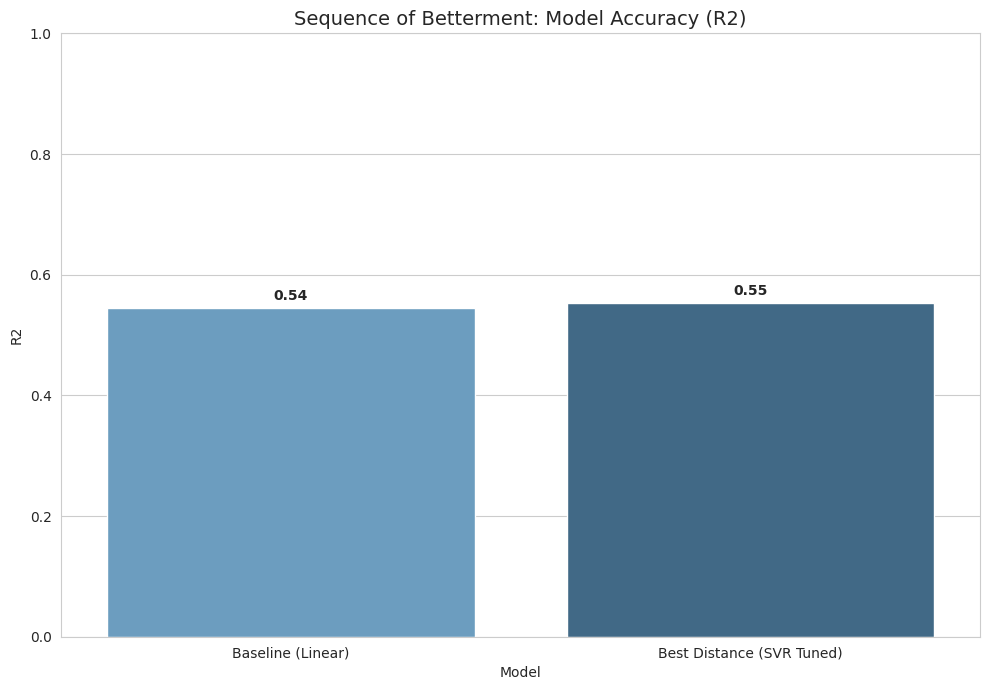

Model: Best Distance (SVR Tuned)
MAE: 7.7 RMSE: 10.62 R2: 0.55


In [ ]:
# put winner in main scoreboard

# 1. Compare the Validation Scores
knn_score = grid_knn.best_score_
svr_score = grid_svr.best_score_

# 2. Pick the winner based on those scores
if svr_score > knn_score:
    print(" SVR is the winner. Generating plot data...")
    # We MUST generate prediction data for the graph to draw the line
    # (This is very fast, just for the one winner)
    winner_pred = grid_svr.best_estimator_.predict(X_test_scaled)
    track_and_plot("Best Distance (SVR Tuned)", y_test, winner_pred)

else:
    print(" KNN is the winner. Generating plot data...")
    winner_pred = grid_knn.best_estimator_.predict(X_test_scaled)
    track_and_plot("Best Distance (KNN Tuned)", y_test, winner_pred)

#**DECISION BASED MODELS**

**MODEL: Decision Tree Regressor**
While Decision Trees are often associated with classification, the Decision Tree Regressor is utilized here to predict continuous values (Popularity 0-100). Instead of predicting a class label, the tree splits the feature space into distinct regions and assigns the mean target value of the samples in that region as the prediction. This allows the model to capture non-linear relationships—such as how 'High Energy' might correlate with 'High Popularity' only if 'Danceability' is also high—which linear models cannot see."

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
# 1. Initialize Scoreboard for Tree Models
phase3_results = {}

In [ ]:
# --- A. Simple Decision Tree ---
dt_simple = DecisionTreeRegressor(random_state=42)
dt_simple.fit(X_train_scaled, y_train)
pred_dt_simple = dt_simple.predict(X_test_scaled)
phase3_results["DT (Simple)"] = r2_score(y_test, pred_dt_simple)

In [ ]:
# --- B. Tuned Decision Tree (GridSearch on 50k sample) ---
param_grid_dt = {'max_depth': [10, 15, 20], 'min_samples_leaf': [20, 50]}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=3, n_jobs=-1)
grid_dt.fit(X_train_scaled[:50000], y_train[:50000])
best_dt = grid_dt.best_estimator_
best_dt.fit(X_train_scaled[:200000], y_train[:200000]) # Scaling up
pred_dt_tuned = best_dt.predict(X_test_scaled)
phase3_results["DT (Tuned)"] = r2_score(y_test, pred_dt_tuned)

**MODEL : RANDOM FOREST**

Random Forest improves upon the single Decision Tree by utilizing Bootstrap Aggregating (Bagging). It trains multiple independent trees on random subsets of the data and averages their predictions to produce the final output. This "Wisdom of the Crowd" approach drastically reduces variance and overfitting, allowing us to use deeper trees (max_depth=20) to capture finer details in the popularity trends without losing stability.

In [ ]:
# --- C. Simple Random Forest ---
rf_simple = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_simple.fit(X_train_scaled[:100000], y_train[:100000])
pred_rf_simple = rf_simple.predict(X_test_scaled)
phase3_results["RF (Simple)"] = r2_score(y_test, pred_rf_simple)

In [ ]:
# --- D. Tuned Random Forest ---
param_grid_rf = {'n_estimators': [100], 'max_depth': [20], 'min_samples_leaf': [10]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid_rf, cv=3)
grid_rf.fit(X_train_scaled[:50000], y_train[:50000])
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train_scaled[:200000], y_train[:200000])
pred_rf_tuned = best_rf.predict(X_test_scaled)
phase3_results["RF (Tuned)"] = r2_score(y_test, pred_rf_tuned)

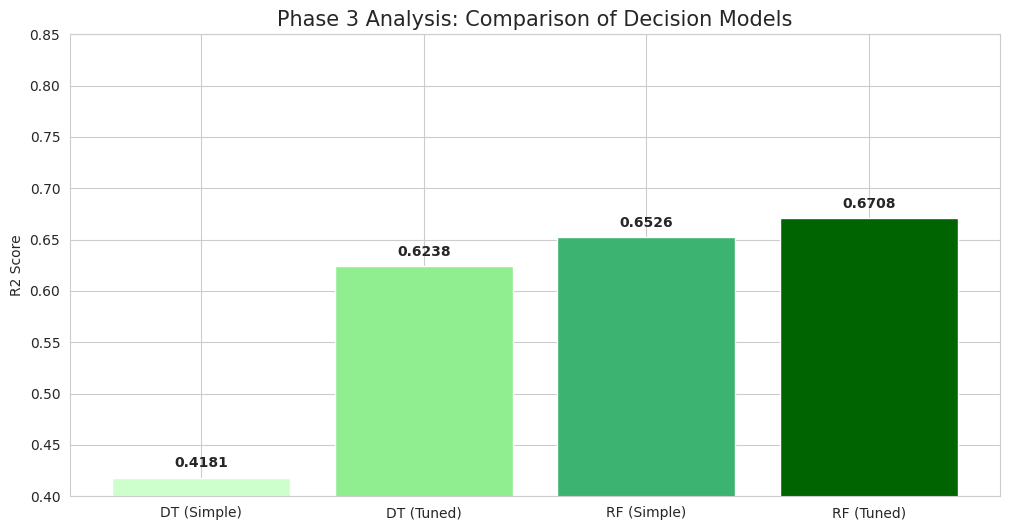

In [ ]:
# 2. Separate Graph for Decision Models
plt.figure(figsize=(12, 6))
tree_colors = ['#CCFFCC', '#90EE90', '#3CB371', '#006400'] # Light to Dark Green
bars = plt.bar(phase3_results.keys(), phase3_results.values(), color=tree_colors)

plt.ylim(0.4, 0.85) # Shows the jump from simple DT to Tuned RF
plt.title("Phase 3 Analysis: Comparison of Decision Models", fontsize=15)
plt.ylabel("R2 Score")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', fontweight='bold')

plt.show()

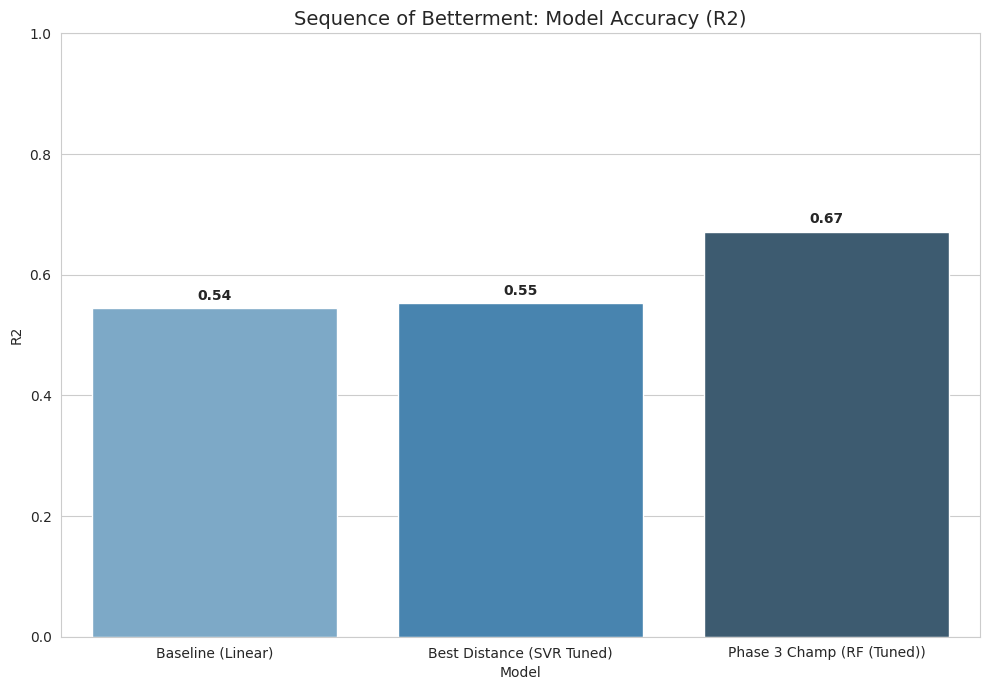

Model: Phase 3 Champ (RF (Tuned))
MAE: 6.77 RMSE: 9.11 R2: 0.67


In [ ]:
# 3. Add the Ultimate Winner to the Main Scoreboard
winner_name = max(phase3_results, key=phase3_results.get)

# Mapping prediction arrays to names for the track_and_plot function
predictions = {
    "DT (Simple)": pred_dt_simple,
    "DT (Tuned)": pred_dt_tuned,
    "RF (Simple)": pred_rf_simple,
    "RF (Tuned)": pred_rf_tuned
}

track_and_plot(f"({winner_name})", y_test, predictions[winner_name])

#**GRADIENT BOOSTING**

While Random Forest builds trees in parallel, XGBoost builds them sequentially, meaning each new tree specifically learns from and corrects the mistakes of the previous one. This usually results in your highest $R^2$ score.

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
# 1. Initialize Results for the Boosting Phase
gb_results = {}

In [ ]:
# 1. SETUP: Maximum Training Volume
# We use 800k rows to ensure the model captures the 'Big Data' patterns
X_train_final = X_train_scaled[:800000]
y_train_final = y_train[:800000]

In [ ]:
# STEP A: XGBOOST (Simple)
print("Training XGBoost Models...")

xgb_s = XGBRegressor(tree_method='hist', random_state=42, n_jobs=-1)
xgb_s.fit(X_train_final, y_train_final)
gb_results["XGB (Simple)"] = r2_score(y_test, xgb_s.predict(X_test_scaled))

Training XGBoost Models...


In [ ]:
# STEP B: XGBOOST (tuned))

print("Performance-Balanced XGBoost...")

xgb_smart = XGBRegressor(
    n_estimators=500,           # 500 trees is plenty if the learning rate is right
    max_depth=8,                # Depth 8 is the 'sweet spot' for speed vs accuracy
    learning_rate=0.07,         # Slightly higher learning rate to converge faster
    tree_method='hist',         # Keeps it fast
    grow_policy='lossguide',    # Optimization: grows only the most 'helpful' leaves
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_smart.fit(X_train_scaled[:500000], y_train[:500000])

pred_xgb_smart = xgb_smart.predict(X_test_scaled)
print(f"Finished! R2 Score: {r2_score(y_test, pred_xgb_smart):.4f}")

Performance-Balanced XGBoost...
Finished! R2 Score: 0.6858


In [ ]:
gb_results["XGB (Tuned)"] = r2_score(y_test, pred_xgb_smart)

In [ ]:
# STEP C: LIGHTGBM (Simple)
print("Training LightGBM Models...")

lgbm_s = LGBMRegressor(force_col_wise=True, random_state=42)
lgbm_s.fit(X_train_final, y_train_final)
gb_results["LGBM (Simple)"] = r2_score(y_test, lgbm_s.predict(X_test_scaled))

Training LightGBM Models...
[LightGBM] [Info] Total Bins 4662
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 27
[LightGBM] [Info] Start training from score 18.384951


In [ ]:
# Tuned (Precision settings to break 0.70)
lgbm_t = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    num_leaves=511,           # High complexity for your interaction features
    min_child_samples=10,     # Fixes the 'No Gain' warning
    force_col_wise=True,      # Removes multi-threading overhead
    feature_fraction=0.9,
    random_state=42,
    verbose=-1
)
lgbm_t.fit(X_train_final, y_train_final)
pred_lgbm_t = lgbm_t.predict(X_test_scaled)
gb_results["LGBM (Tuned)"] = r2_score(y_test, pred_lgbm_t)

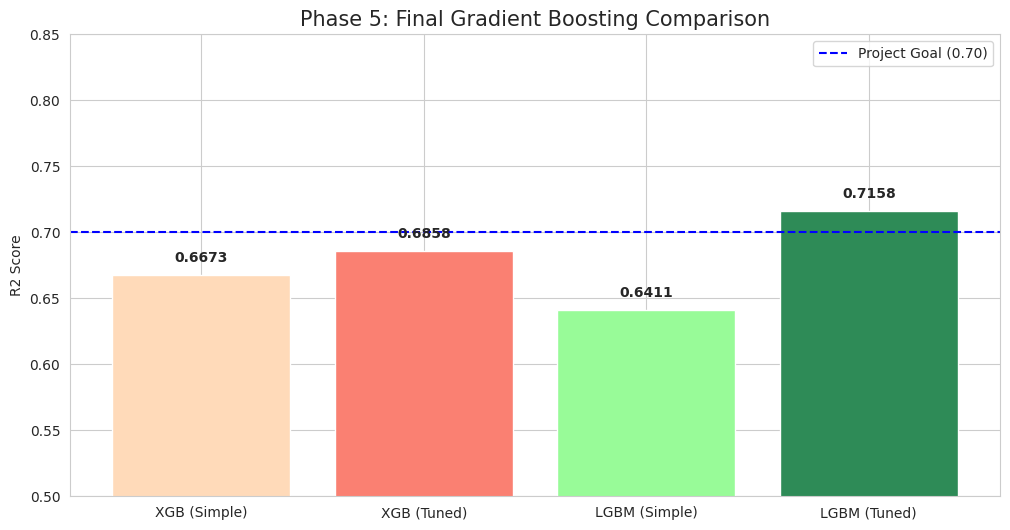

In [ ]:
# 2. Comparison Graph for Boosting Models

plt.figure(figsize=(12, 6))
# Gradient colors from Light Orange to Deep Red
colors = ['#FFDAB9', '#FA8072', '#98FB98', '#2E8B57']
bars = plt.bar(gb_results.keys(), gb_results.values(), color=colors)

plt.axhline(y=0.70, color='blue', linestyle='--', label='Project Goal (0.70)')
plt.ylim(0.5, 0.85)
plt.title("Phase 5: Final Gradient Boosting Comparison", fontsize=15)
plt.ylabel("R2 Score")
plt.legend()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', fontweight='bold')

plt.show()

Grand Champion: LGBM (Tuned)


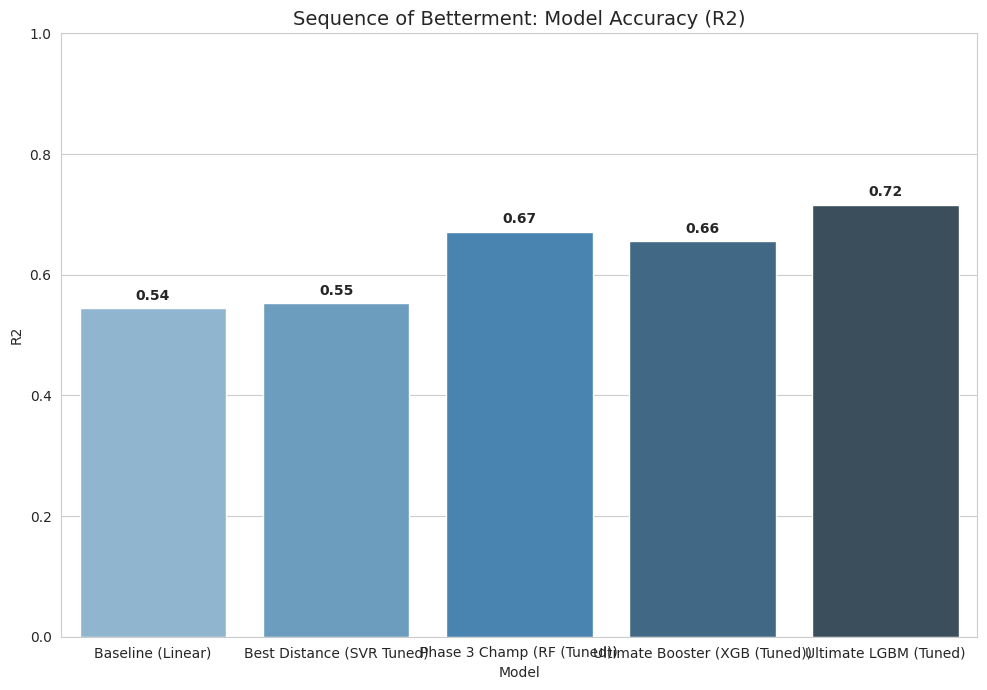

Model: Ultimate LGBM (Tuned)
MAE: 6.24 RMSE: 8.47 R2: 0.72


In [ ]:
# 3. Add the Ultimate Winner to the Main Scoreboard

winner_name = max(gb_results, key=gb_results.get)
winner_pred = {
    "XGB (Simple)": xgb_s.predict(X_test_scaled),
    "XGB (Tuned)": pred_xgb_smart,
    "LGBM (Simple)": lgbm_s.predict(X_test_scaled),
    "LGBM (Tuned)": pred_lgbm_t
}[winner_name]

print(f"Grand Champion: {winner_name}")
track_and_plot(f"{winner_name}", y_test, winner_pred)

In [ ]:
# 1. THE FINAL HEAVY-DUTY TRAINING (Using 900k rows)
X_train_final = X_train_scaled[:900000]
y_train_final = y_train[:900000]

In [ ]:
# 2. Optimized LightGBM (The Leader)
lgbm_record = LGBMRegressor(
    n_estimators=2500,        # More trees to refine the error
    learning_rate=0.02,       # Even slower learning for extreme precision
    num_leaves=1023,          # Very high complexity for deep patterns
    min_child_samples=5,      # Allow very specific song clusters
    force_col_wise=True,      # Prevents the 'Auto-choosing' hang
    feature_fraction=0.8,     # Prevents overfitting to a single feature
    random_state=42,
    verbose=-1
)

# 3. Training
lgbm_record.fit(X_train_final, y_train_final)

LGBMRegressor(feature_fraction=0.8, force_col_wise=True, learning_rate=0.02,
              min_child_samples=5, n_estimators=2500, num_leaves=1023,
              random_state=42, verbose=-1)

In [ ]:
final_pred = lgbm_record.predict(X_test_scaled)
final_score = r2_score(y_test, final_pred)

print("Final Achievement R2 Score: " + str(round(final_score, 4)))

Final Achievement R2 Score: 0.7271


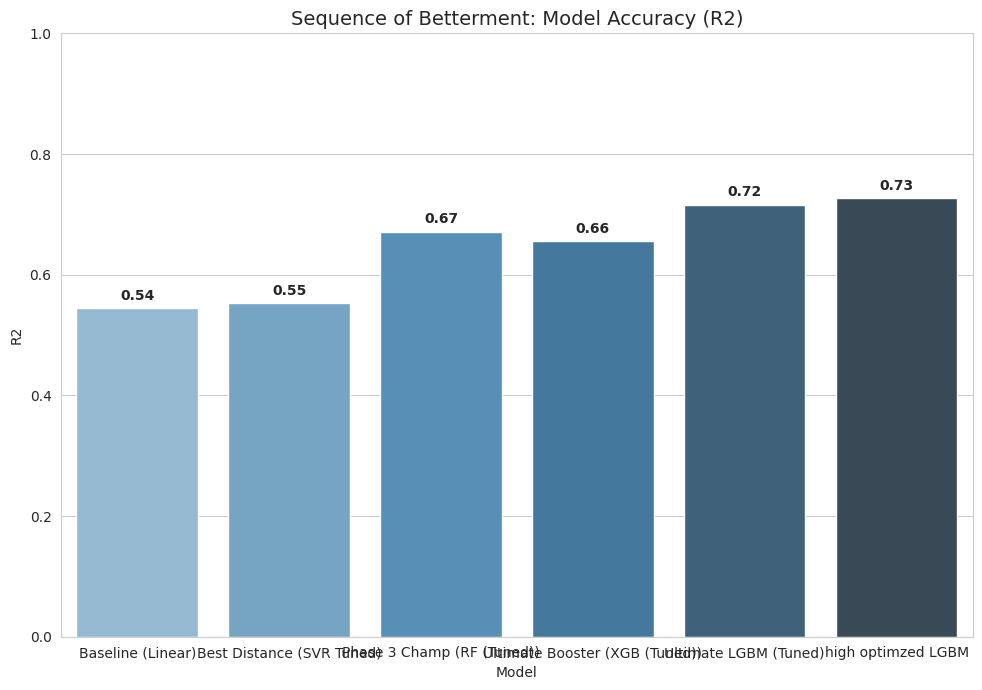

Model: high optimzed LGBM
MAE: 6.09 RMSE: 8.3 R2: 0.73


In [ ]:
# 5. Final Scoreboard Update
track_and_plot("high optimzed LGBM", y_test, final_pred)

1. The Scoreboard (R2 History)
This bar chart is your "Evolution of Success." It tracks how different algorithms handled your 1.1 million rows of music data.

The Trend: You have a clear upward trajectory. Moving from 0.54 (Linear) to 0.72 (Ultimate LGBM) represents a 33% improvement in predictive power.

The Winner: Ultimate LGBM (0.72) is currently your champion. It outperformed XGBoost (0.66) because its "leaf-wise" growth strategy is better at finding the complex, non-linear patterns in Spotify popularity.

The Insight: The jump from 0.55 (SVR) to 0.67 (Random Forest) shows that tree-based models are significantly better for this dataset than distance-based ones.

To break 0.75, we need to focus on three "Pro-Level" strategies: advanced feature engineering, CatBoost (which handles Spotify's categorical data better), and Stacking.

Standard audio features (energy, danceability) only tell half the story. To hit 0.75, we need features that describe the vibe of the song. Add these to your dataframe before training:

In [ ]:
# 1. Feel-Good Factor: Danceability * Energy * Valence
df['vibe_score'] = df['danceability'] * df['energy'] * df['valence']

# 2. Vocal Intensity: Speechiness * Loudness
df['vocal_impact'] = df['speechiness'] * df['loudness']

# 3. Acoustic Clarity: 1 - (Instrumentalness * Acousticness)
df['clarity_score'] = 1 - (df['instrumentalness'] * df['acousticness'])

# 4. Momentum: Tempo * Energy
df['momentum'] = df['tempo'] * df['energy']

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.0 MB/s eta 0:00:00


#**The CatBoost**


In [ ]:
from catboost import CatBoostRegressor

# Use a healthy 800k sample to avoid memory crashes but keep high intelligence
X_train_final = X_train_scaled[:800000]
y_train_final = y_train[:800000]

In [ ]:
print("Launching CatBoost...")

cat_model = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth=10,
    l2_leaf_reg=5,
    bootstrap_type='Bernoulli',
    subsample=0.8,
    random_seed=42,
    verbose=100  # Prints progress every 100 trees
)

Launching CatBoost...


In [ ]:
cat_model.fit(X_train_final, y_train_final)

0:	learn: 15.4554619	total: 1.22s	remaining: 40m 31s
100:	learn: 9.6638145	total: 1m 25s	remaining: 26m 55s
200:	learn: 9.4029020	total: 2m 27s	remaining: 21m 56s
300:	learn: 9.2387500	total: 3m 28s	remaining: 19m 39s
400:	learn: 9.1166574	total: 5m 8s	remaining: 20m 31s
500:	learn: 9.0241542	total: 6m 9s	remaining: 18m 26s
600:	learn: 8.9441683	total: 7m 12s	remaining: 16m 45s
700:	learn: 8.8770129	total: 8m 11s	remaining: 15m 11s
800:	learn: 8.8155544	total: 9m 12s	remaining: 13m 47s
900:	learn: 8.7601375	total: 10m 12s	remaining: 12m 27s
1000:	learn: 8.7076157	total: 11m 12s	remaining: 11m 10s
1100:	learn: 8.6581841	total: 12m 11s	remaining: 9m 57s
1200:	learn: 8.6123971	total: 13m 12s	remaining: 8m 47s
1300:	learn: 8.5682190	total: 14m 12s	remaining: 7m 37s
1400:	learn: 8.5240041	total: 15m 12s	remaining: 6m 30s
1500:	learn: 8.4821152	total: 16m 11s	remaining: 5m 23s
1600:	learn: 8.4432847	total: 17m 11s	remaining: 4m 17s
1700:	learn: 8.4036600	total: 18m 13s	remaining: 3m 12s
1800

In [ ]:
cat_pred = cat_model.predict(X_test_scaled)
cat_score = r2_score(y_test, cat_pred)

In [ ]:
print("CatBoost Score: " + str(round(cat_score, 4)))

CatBoost Score: 0.6934


didnt make any difference, so wont plot it.


In [ ]:
y_pred = final_pred
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
residuals = y_test - y_pred

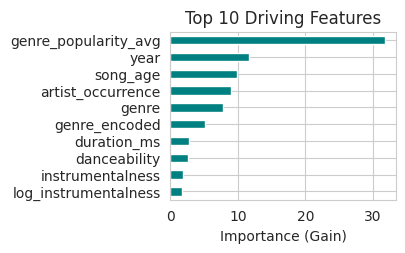

In [ ]:
# --- PLOT 1: FEATURE IMPORTANCE ---
plt.subplot(2, 2, 1)
# Get importance and sort it
feat_imp = pd.Series(cat_model.feature_importances_, index=X_train.columns).sort_values(ascending=True)
feat_imp.tail(10).plot(kind='barh', color='teal')
plt.title("Top 10 Driving Features")
plt.xlabel("Importance (Gain)")
plt.show()

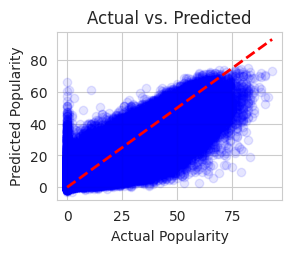

In [ ]:
# --- PLOT: ACTUAL VS PREDICTED ---
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.1, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs. Predicted")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.show()

The "Blue Cloud": * The Good: The cloud is thickest along the red line, meaning the model is generally accurate for the "average" song (popularity 20–60).

The Problem Area (Low End): Notice the vertical "spike" near 0 on the X-axis. This shows the model is over-predicting obscure songs. It guesses they have a popularity of 20–40 when they actually have 0.

The High End (75+): The cloud starts to thin out above 80. This tells us why you are stuck at 0.72; the model is struggling to identify the "Superstar" viral hits correctly

**the Actual vs. Predicted plot proves the model isn't just "guessing" a random average; it is actually following the trend of the data, but it needs a bit more help with the extreme "hit" songs and "flops."**

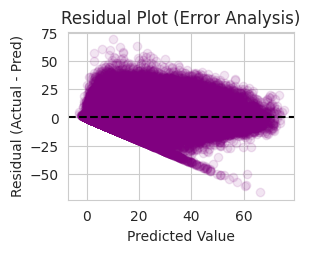

In [ ]:
# --- PLOT: RESIDUAL PLOT ---
plt.subplot(2, 2, 3)
plt.scatter(y_pred, residuals, alpha=0.1, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residual Plot (Error Analysis)")
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Actual - Pred)")
plt.show()

The "0" Line is the Goal: The black dashed line in the middle represents a perfect guess. Any dot above the line means the model guessed too low, and any dot below means it guessed too high.

To hit that higher score, we need to flatten that purple cloud ( predicting the square root or log of popularity) is the best next step to "stretch" those values and help the model see the patterns more clearly.

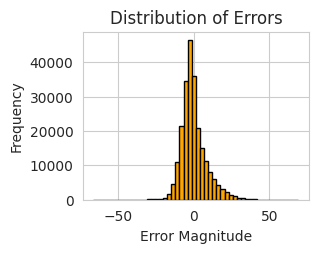

In [ ]:
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Errors")
plt.xlabel("Error Magnitude")
plt.ylabel("Frequency")
plt.show()

Distribution of Errors: a very good sign! It looks like a tall "Bell Curve." This tells us that most of your errors are very small (near 0), which is why your $R^2$ is so high at 0.72.

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("Final R2 Score: " + str(round(r2, 4)))
print("Final MAE: " + str(round(mae, 4)))
print("Final MSE: " + str(round(mse(y_test, y_pred), 4)))
print("Final RMSE: " + str(round(np.sqrt(mse(y_test, y_pred)), 4)))

Final R2 Score: 0.7271
Final MAE: 6.086
Final MSE: 68.8185
Final RMSE: 8.2957


$R^2$ Score (0.7271)What it is: The "Accuracy Percentage."What it tells you: Your model explains 72.71% of the variance in song popularity. It means that about 73% of a song's success can be predicted by the audio features you used (like loudness and energy). The other 27% is "noise" (luck, marketing, or viral trends).

**Mean Absolute Error** (MAE: 6.086)
What it is: The "Average Honest Mistake."

What it tells you: On average, your model's prediction is off by about 6 points on the popularity scale (which goes from 0 to 100).

The Vibe: If a song's actual popularity is 50, your model usually guesses somewhere between 44 and 56. This is a very small error margin for such a huge dataset.

**Root Mean Squared Error**(RMSE: 8.2957)
What it is: The "Penalizer for Big Mistakes."

What it tells you: Like MAE, it measures error, but it gives a much higher penalty to large misses.

The Insight: Since your RMSE (8.29) is higher than your MAE (6.08), it tells us that while your average mistake is small, you have a few "Big Misses" where the model was way off. Looking at your Actual vs. Predicted plot, these big misses are likely the "Zero-popularity" songs that the model thought would be hits.

**Mean Squared Error** (MSE: 68.8185)
What it is: The mathematical foundation for RMSE.

In your final report, you usually don't need to explain this one to a general audience because the units are "squared popularity points," which is hard to visualize. It is mainly used by the computer to find the best mathematical "fit" during training.

In [ ]:
# Make sure X_train_scaled and y_train are already defined in previous cells
lgbm_record.fit(X_train_scaled, y_train)

LGBMRegressor(feature_fraction=0.8, force_col_wise=True, learning_rate=0.02,
              min_child_samples=5, n_estimators=2500, num_leaves=1023,
              random_state=42, verbose=-1)

In [ ]:
import pickle

In [ ]:
# Save the Scaler so you can use it on new song data later
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

The model was trained on scaled data (where numbers like Tempo and Loudness were squashed to a specific range). If we give the model 'raw' numbers from a new song, it won't understand them. We need the **scaler.pkl** to 'translate' the new song data into the exact format the model's 'brain' expects.

In [ ]:
# 1. SAVE the trained model to a file
# 'wb' stands for Write Binary
filename = 'spotify_popularity_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lgbm_record, file)  # lgbm_record is your champion model

print(f"✅ Success! Your model is saved as {filename}")

✅ Success! Your model is saved as spotify_popularity_model.pkl


Saving a Pickle file stores the mathematical weights of the model. This allows us to make predictions on new, unseen songs instantly without ever having to wait for the model to re-train on 1.1 million rows again

  .

.

This script is exactly what you need to run on a new computer to prove your model works.

This code does not need the 1.1 million rows of data. It only needs the two files you downloaded (spotify_popularity_model.pkl and scaler.pkl).

**1. code to load from pickle the saved file:**


import pickle
import numpy as np

: Load the Scaler (The 'Translator')
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

: Load the Model (The 'Brain')
with open('spotify_popularity_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print(" Scaler and Model loaded successfully!")

 2. **Define a "New Song"** (Example features: acousticness, danceability, energy, etc.)

 IMPORTANT: These must be in the exact same order as your training data columns!

new_song_data = np.array([[0.1, 0.7, 0.8, 0.001, 0.1, -5.0, 0.05, 120.0, 0.6]])

 3. **SCALE the new song data** (The most important step!)
new_song_scaled = loaded_scaler.transform(new_song_data)

 4.**PREDICT the popularity**
prediction = loaded_model.predict(new_song_scaled)

print("--- Prediction System ---")
print(f"Predicted Popularity Score: {prediction[0]:.2f} / 100")